In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
data = pd.read_csv('Heart1.csv')

In [ ]:
data.head(10)

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal
5,120,236,0,0,178,0,0.8,1,0,normal
6,140,268,0,2,160,0,3.6,3,2,normal
7,120,354,0,0,163,1,0.6,1,0,normal
8,130,254,0,2,147,0,1.4,2,1,reversable
9,140,203,1,2,155,1,3.1,3,0,reversable


In [ ]:
#Null value imputation (mean)
null = (data.isnull().sum() / len(data))*100
null[null > 0]

Oldpeak    6.930693
dtype: float64

In [ ]:
#Dropping of missing values
data.dropna(inplace = True)

In [ ]:
null = (data.isnull().sum() / len(data))*100
null[null > 0]

Series([], dtype: float64)

In [ ]:
data.shape

(282, 10)

In [ ]:
#finding total duplicates
duplicates = data.duplicated().sum()
duplicates


0

In [ ]:
#Duplicate data dropping
data.drop_duplicates(inplace = True)

In [ ]:
data.shape

(303, 10)

In [ ]:
#categorical and Numerical columns seperation
categ = data.select_dtypes(include = np.object)
Num = data.select_dtypes(include = np.number)

<ipython-input-70-bab5265e0cbe>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categ = data.select_dtypes(include = np.object)


In [ ]:
categ

,Thal
0,fixed
1,normal
2,reversable
3,normal
4,normal
...,...
298,reversable
299,reversable
300,reversable
301,normal


In [ ]:
#One Hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) 
ohe.fit(categ)
#Transforming the data 
onehotlabels = ohe.transform(categ)
print(onehotlabels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#Label Encoder

le = LabelEncoder()

encoded = le.fit_transform(categ)

print(encoded)

[0 1 2 1 1 1 1 1 2 2 0 1 0 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2
 0 2 1 2 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 2 2 1 2 2 1 1 2 2 0
 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2
 1 0 2 2 0 1 1 2 2 2 2 1 2 1 1 2 2 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 2 1 2 1
 1 1 2 1 2 2 1 1 2 2 2 2 2 1 1 1 1 2 1 1 2 1 2 2 1 1 0 2 2 0 1 1 2 2 1 2 1
 1 2 0 2 2 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 0 2 2 1 1 1 1 1 1
 2 1 1 1 1 1 0 1 0 2 1 2 0 2 1 1 2 1 1 1 1 2 1 2 1 2 0 0 2 2 1 2 1 0 2 1 1
 0 2 2 2 2 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#KNN IMPUTER

from sklearn.impute import KNNImputer

KNN = KNNImputer(n_neighbors = 2)

KNN.fit_transform(Num)

array([[145. , 233. ,   1. , ...,   2.3,   3. ,   0. ],
       [160. , 286. ,   0. , ...,   1.5,   2. ,   3. ],
       [120. , 229. ,   0. , ...,   2.6,   2. ,   2. ],
       ...,
       [130. , 131. ,   0. , ...,   1.2,   2. ,   1. ],
       [130. , 236. ,   0. , ...,   0. ,   2. ,   1. ],
       [138. , 175. ,   0. , ...,   0. ,   1. ,   0. ]])

In [ ]:
#Z-score using formula
 
mean = data.mean().sum()
std = data.std().sum()

zscore = ((Num - mean)/std)
zscore

<ipython-input-75-28c69878357b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean().sum()
<ipython-input-75-28c69878357b>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std().sum()


,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,-4.006977,-3.097795,-5.494729,-5.484397,-3.955319,-5.505061,-5.481298,-5.474066,-5.505061
1,-3.852002,-2.550219,-5.505061,-5.484397,-4.389246,-5.494729,-5.489563,-5.484397,-5.474066
2,-4.265267,-3.139121,-5.505061,-5.484397,-4.172282,-5.494729,-5.478198,-5.484397,-5.484397
3,-4.161951,-2.922157,-5.505061,-5.505061,-3.573049,-5.505061,-5.468900,-5.474066,-5.505061
4,-4.161951,-3.397411,-5.505061,-5.484397,-3.728023,-5.505061,-5.490596,-5.494729,-5.505061
...,...,...,...,...,...,...,...,...,...
298,-4.368583,-2.777515,-5.505061,-5.505061,-4.141288,-5.505061,-5.492663,-5.484397,-5.505061
299,-4.017308,-3.511059,-5.494729,-5.505061,-4.048303,-5.505061,-5.469933,-5.484397,-5.484397
300,-4.161951,-4.151619,-5.505061,-5.505061,-4.316925,-5.494729,-5.492663,-5.484397,-5.494729
301,-4.161951,-3.066800,-5.505061,-5.484397,-3.707360,-5.505061,-5.505061,-5.484397,-5.494729


In [ ]:
#Removing zscore greater than 3
mask = (zscore > 3)
removed = data[~mask] 

In [ ]:
data.shape

(303, 10)

In [ ]:
null1 = Num.isna().sum()
null1[null1 > 0]

Series([], dtype: int64)

In [ ]:
Num.dropna(inplace = True)

In [ ]:
#Binarizer

from sklearn.preprocessing import Binarizer
bina = Binarizer(threshold = 25)

binarized = bina.fit_transform(Num)
binarized

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#Min - Max Scalar

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

scaled = minmax.fit_transform(Num)
scaled

array([[0.48113208, 0.24429224, 1.        , ..., 0.37096774, 1.        ,
        0.        ],
       [0.62264151, 0.3652968 , 0.        , ..., 0.24193548, 0.5       ,
        1.        ],
       [0.24528302, 0.23515982, 0.        , ..., 0.41935484, 0.5       ,
        0.66666667],
       ...,
       [0.33962264, 0.01141553, 0.        , ..., 0.19354839, 0.5       ,
        0.33333333],
       [0.33962264, 0.25114155, 0.        , ..., 0.        , 0.5       ,
        0.33333333],
       [0.41509434, 0.11187215, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
x = data.drop("Thal", axis = 1)
y = data[["Thal"]]

In [ ]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components = 1)
extracted = LDA.fit_transform(x, y)

print(np.shape(extracted))

(282, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
extract = pca.fit_transform(x)
print(np.shape(extract))

(282, 7)


In [ ]:
le = LabelEncoder()

encoded = le.fit_transform(y)

print(encoded)

[0 1 2 1 1 1 1 1 2 2 0 1 0 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2
 0 2 1 2 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 2 2 1 2 2 1 1 2 2 0
 1 1 2 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 1 2 2 2 2 2 1 0 2 2 0 1 1 2 2 2 2 1 2
 1 1 2 2 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 2 1 2 1 1 1 2 1 2 2 1 1 2 2 2 2 1
 1 2 2 1 1 0 2 2 0 1 1 2 2 1 2 1 1 2 0 2 2 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 2 1 2 1 0 2 2 1 1 1 1 1 1 2 1 1 1 1 1 0 1 0 2 1 2 0 2 1 1 2 1 1 1 1
 2 1 2 1 2 0 0 2 2 1 2 1 0 2 1 1 0 2 2 2 2 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Chi - square test
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, VarianceThreshold

selector = SelectKBest(score_func=chi2, k = 3)
newda = selector.fit_transform(abs(x), encoded)
support = selector.get_support()
print(list(x.columns[support]))

['Chol', 'MaxHR', 'Oldpeak']


In [ ]:
#Using information
info = SelectKBest(score_func = mutual_info_classif, k = 3)
newda1 = info.fit_transform(abs(x), encoded)
supports = info.get_support()
print(list(x.columns[supports]))

['MaxHR', 'Oldpeak', 'Ca']


In [ ]:
variance = VarianceThreshold(0.4)
newda2 = variance.fit_transform(x)
print("Old shape = ", x.shape) 
print("New shape = ", newda2.shape)

Old shape =  (282, 9)
New shape =  (282, 6)


In [ ]:
corr = x.corr()
corr


,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
RestBP,1.000000,0.133027,0.210008,0.152926,-0.041718,0.053504,0.174530,0.103883,0.095698
Chol,0.133027,1.000000,0.004306,0.162495,-0.002157,0.055537,0.042827,-0.001658,0.107912
Fbs,0.210008,0.004306,1.000000,0.082744,-0.002800,0.031642,0.014698,0.076567,0.130772
RestECG,0.152926,0.162495,0.082744,1.000000,-0.099527,0.103650,0.139963,0.169133,0.145896
MaxHR,-0.041718,-0.002157,-0.002800,-0.099527,1.000000,-0.399719,-0.329018,-0.370037,-0.272807
ExAng,0.053504,0.055537,0.031642,0.103650,-0.399719,1.000000,0.301171,0.273391,0.128354
Oldpeak,0.174530,0.042827,0.014698,0.139963,-0.329018,0.301171,1.000000,0.553001,0.304911
Slope,0.103883,-0.001658,0.076567,0.169133,-0.370037,0.273391,0.553001,1.000000,0.106599
Ca,0.095698,0.107912,0.130772,0.145896,-0.272807,0.128354,0.304911,0.106599,1.000000


In [ ]:
#Highest positive correlation "Change the threshold as per you dataset correlation values"
correlated_row = []
correlated_col = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        if (corr.iloc[i,j]) > 0 and corr.iloc[i,j] >= 0.5:
            correlated_row.append(corr.columns[i])
            correlated_col.append(corr.columns[j])

print(correlated_row)
print(correlated_col)

['Oldpeak']
['Slope']


In [ ]:
#Highest Negative correlation "Change the threshold as per you dataset correlation values"

correlated_row = []
correlated_col = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        if (corr.iloc[i,j]) < 0 and corr.iloc[i,j] <= -0.1:
            correlated_row.append(corr.columns[i])
            correlated_col.append(corr.columns[j])

print(correlated_row)
print(correlated_col)

['MaxHR', 'MaxHR', 'MaxHR', 'MaxHR']
['ExAng', 'Oldpeak', 'Slope', 'Ca']


**Plotting**

<BarContainer object of 3 artists>

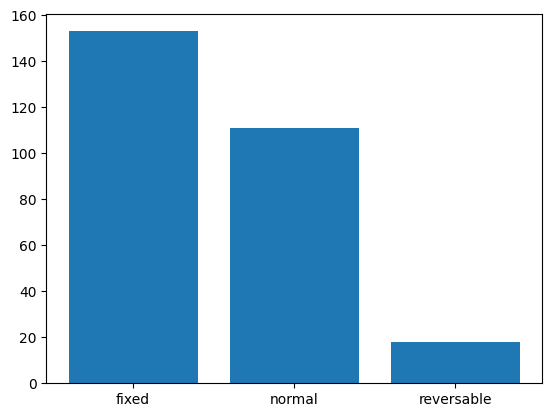

In [ ]:
#UNIVARIATE PLOTS

import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(data['Thal'].unique(), data['Thal'].value_counts())

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


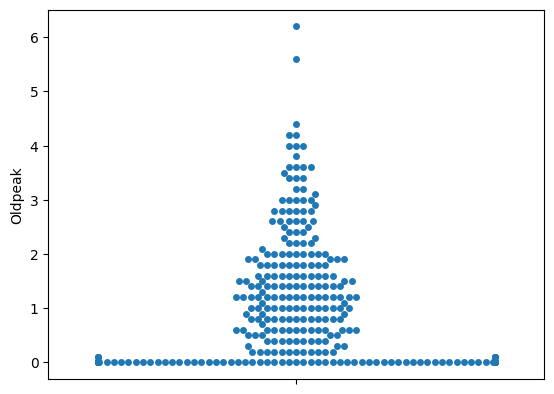

In [ ]:
sns.swarmplot(data['Oldpeak'])
plt.show()

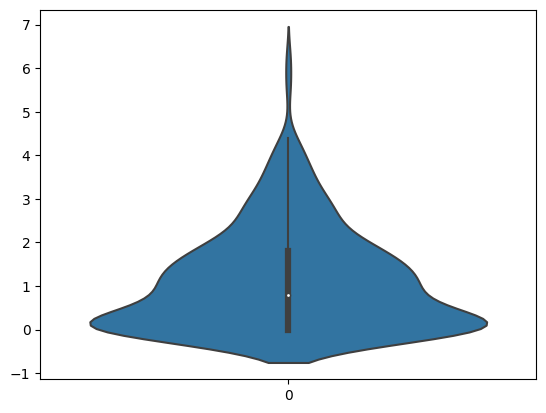

In [ ]:
sns.violinplot(data['Oldpeak'])
plt.show()

**BIVARIATE**


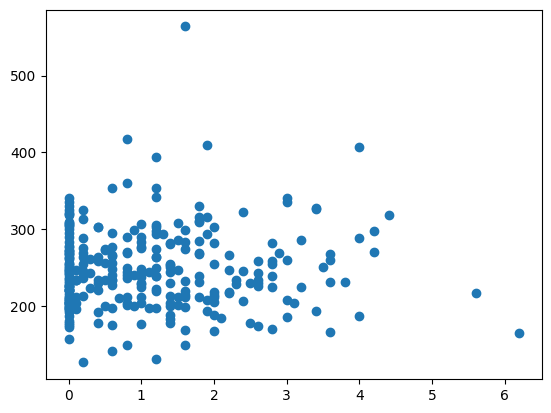

In [ ]:
plt.scatter(data['Oldpeak'], data['Chol'])
plt.show()

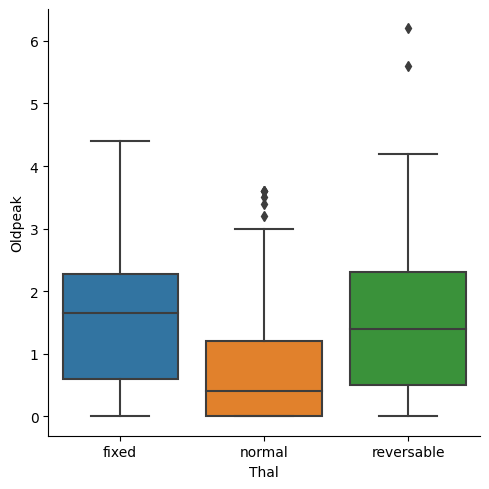

In [ ]:
sns.catplot(x = 'Thal', y = 'Oldpeak', kind = 'box', data = data)

<Axes: xlabel='Thal', ylabel='count'>

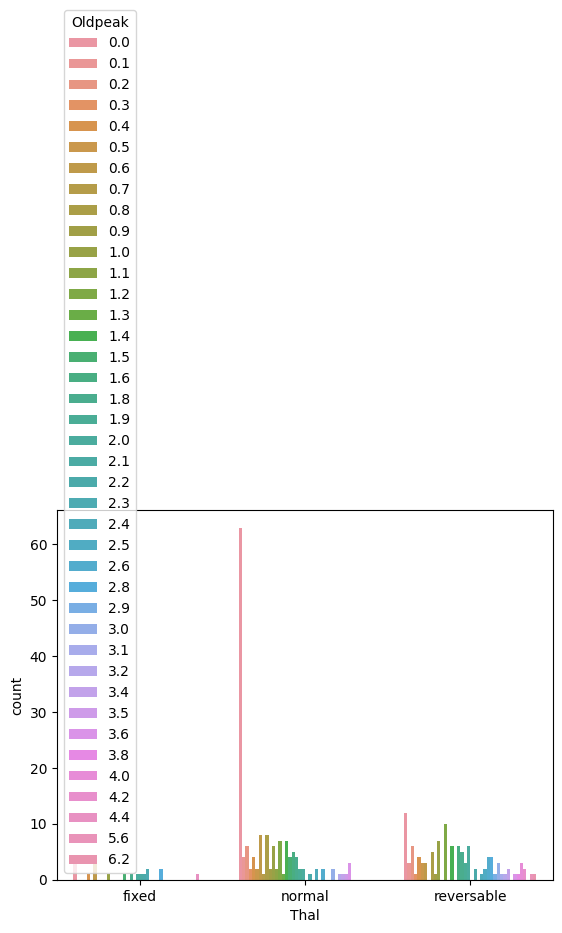

In [ ]:
sns.countplot(x = "Thal", hue = 'Oldpeak', data = data)

In [ ]:
pd.crosstab(data.Thal, data.Oldpeak)

Oldpeak,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,3.2,3.4,3.5,3.6,3.8,4.0,4.2,4.4,5.6,6.2
Thal,,,,,,,,,,,,,,,,,,,,,
fixed,3,0,0,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
normal,63,4,6,2,4,2,8,1,8,2,...,1,1,1,3,0,0,0,0,0,0
reversable,12,3,6,1,4,3,3,0,5,1,...,1,2,0,1,1,3,2,0,1,1


**MULTIVARIATE**

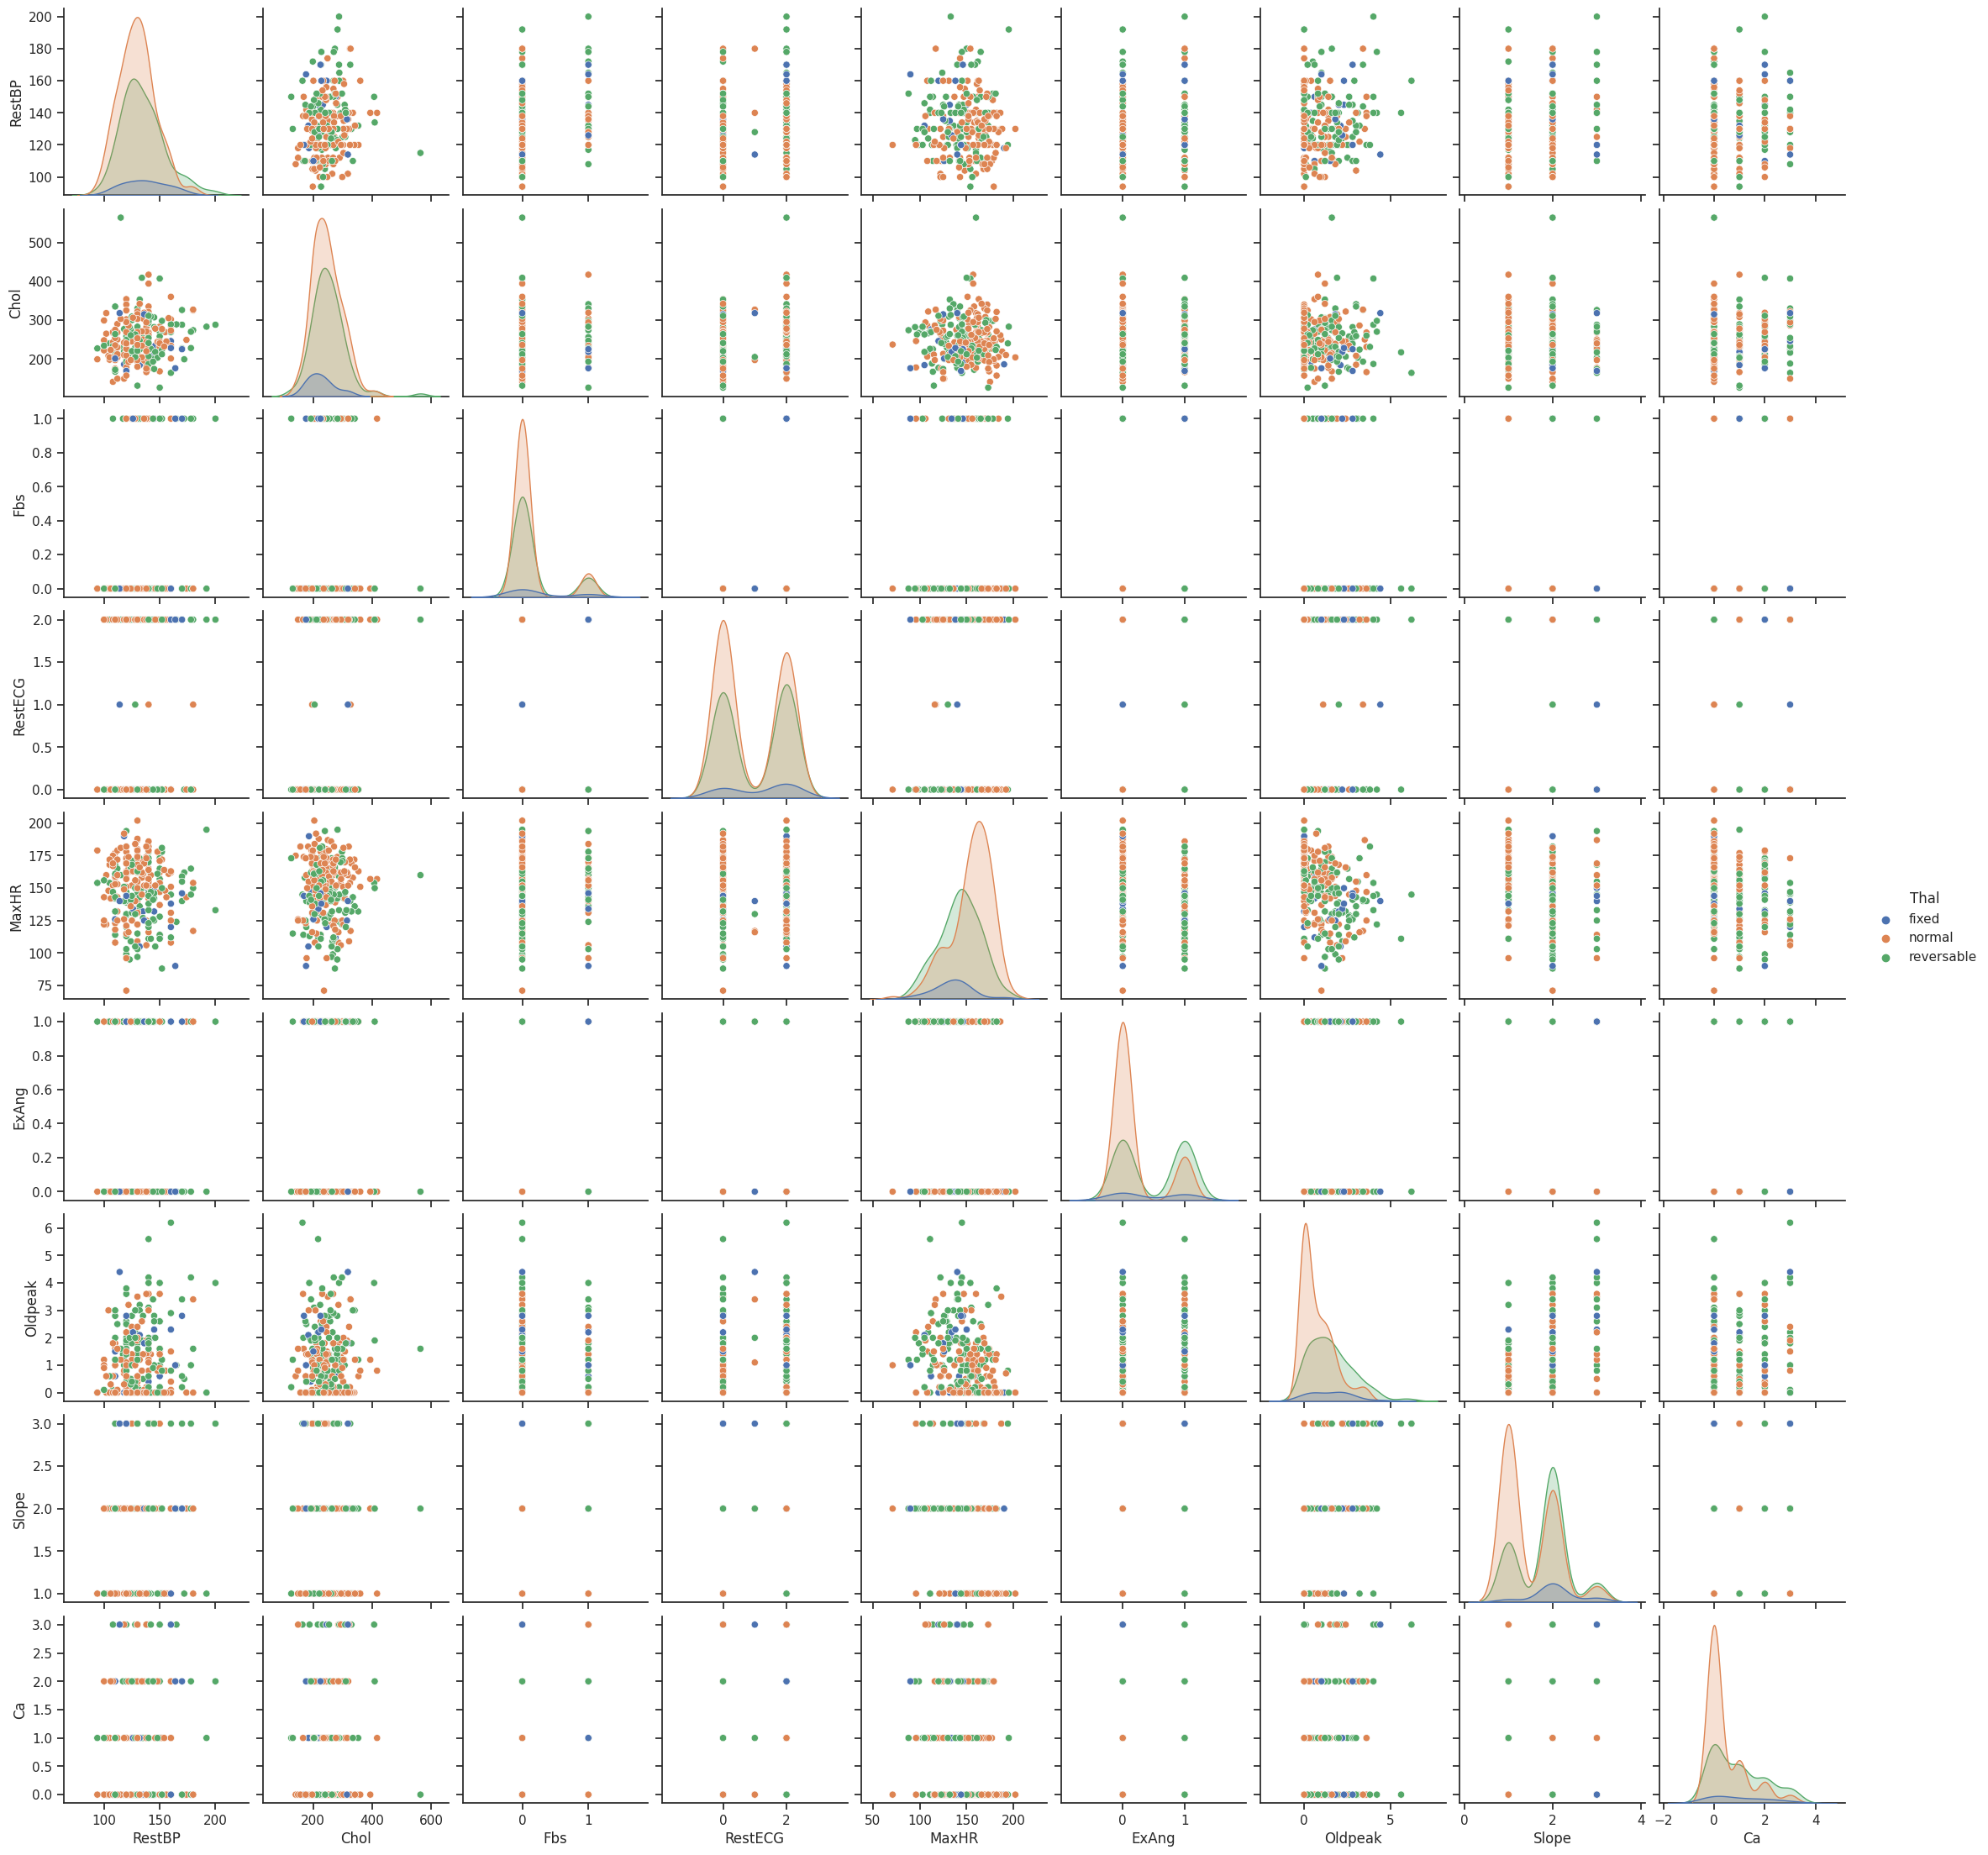

In [ ]:
#The Hue should be inside the data also like that column should exist in the given data or else it'll throw a error
sns.pairplot(data, hue = 'Thal')